In [2]:
pip install pandas 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install pandas numpy matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install scikit-learn 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install tensorflow 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import pandas as pd

# Training dan Test dataset diambil secara online
train_url = "https://raw.githubusercontent.com/defcom17/NSL_KDD/master/KDDTrain+.txt"
test_url = "https://raw.githubusercontent.com/defcom17/NSL_KDD/master/KDDTest+.txt"

# Karena dataset isinya angka semua, diberi collum 
col_names_url = "https://raw.githubusercontent.com/defcom17/NSL_KDD/master/KDDTrain%2B.names"
col_names = [
    "duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes", "land",
    "wrong_fragment", "urgent", "hot", "num_failed_logins", "logged_in", "num_compromised",
    "root_shell", "su_attempted", "num_root", "num_file_creations", "num_shells",
    "num_access_files", "num_outbound_cmds", "is_host_login", "is_guest_login",
    "count", "srv_count", "serror_rate", "srv_serror_rate", "rerror_rate", "srv_rerror_rate",
    "same_srv_rate", "diff_srv_rate", "srv_diff_host_rate", "dst_host_count",
    "dst_host_srv_count", "dst_host_same_srv_rate", "dst_host_diff_srv_rate",
    "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate",
    "dst_host_serror_rate", "dst_host_srv_serror_rate", "dst_host_rerror_rate",
    "dst_host_srv_rerror_rate", "label", "difficulty"
]

# Load data yang akan dipakai
df_train = pd.read_csv(train_url, names=col_names)
df_test = pd.read_csv(test_url, names=col_names)

# Collum difficulty di drop karena tidak perlu
df_train.drop('difficulty', axis=1, inplace=True)
df_test.drop('difficulty', axis=1, inplace=True)



In [ ]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
#akan menormalisasikan fitur

# Menggambungkan dataset train dan dataset test untuk encoding nanti
df = pd.concat([df_train, df_test], ignore_index=True)

# Kategori protocol type, service, flag diubah  menjadi numerik karena machine learning tidak bisa membaca 'str'
categorical_cols = ['protocol_type', 'service', 'flag']
df[categorical_cols] = df[categorical_cols].apply(LabelEncoder().fit_transform)

# Separate features and labels
X = df.drop('label', axis=1)
y = df['label']

# Normalisasi fitur dari [0,1] saja
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# Mark normal vs anomaly, transformasi label normal dan attack menjadi binary form
y_binary = y.apply(lambda x: 0 if x == 'normal' else 1)  # 0 = normal, 1 = attack

# Dilatih hanya normalnya saja (0)
X_train_ae = X_scaled[y_binary == 0]


In [ ]:
#membuat model autoencoder
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

input_dim = X_train_ae.shape[1]

# Define encoder-decoder structure
input_layer = Input(shape=(input_dim,))
encoded = Dense(32, activation='relu')(input_layer)
encoded = Dense(16, activation='relu')(encoded)
encoded = Dense(8, activation='relu')(encoded)

decoded = Dense(16, activation='relu')(encoded)
decoded = Dense(32, activation='relu')(decoded)
output_layer = Dense(input_dim, activation='sigmoid')(decoded)
# Model awalnya menerima input dengan 32 neuron lalu dikompres menjadi 16 -> 8 lalu dibuat ulang -> 16 -> 32
autoencoder = Model(inputs=input_layer, outputs=output_layer)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')


In [ ]:
history = autoencoder.fit(
    X_train_ae, X_train_ae,
    epochs=50,
    batch_size=256,
    shuffle=True,
    validation_split=0.1,
    verbose=1
)
#Input dan Output akan sama (X_train_ae) karena merupakan autoencoder
#Banyak epochs, 50
#Banyak sample yang di proses sebelum update, 256

Epoch 1/50
271/271 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0023 - val_loss: 0.0036
Epoch 2/50
271/271 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0023 - val_loss: 0.0036
Epoch 3/50
271/271 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0022 - val_loss: 0.0036
Epoch 4/50
271/271 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0022 - val_loss: 0.0036
Epoch 5/50
271/271 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0022 - val_loss: 0.0035
Epoch 6/50
271/271 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0023 - val_loss: 0.0035
Epoch 7/50
271/271 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0022 - val_loss: 0.0035
Epoch 8/50
271/271 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0022 - val_loss: 0.0035
Epoch 9/50
271/271 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0022 - val_loss: 0.0035
Epoch 10/50
271/271 ━━━━━━━━━━━━━━━━━━━━ 0s 944us/step - loss: 0.0022 - val_loss: 0.0035
Epoch 11/50
271/271 ━━━━━━━━━━━━━━━━━━━━ 0s 930us/step - loss: 0.0022 - val_loss: 0.0035
Epoch 12/50
271/271 ━━━━━━━━━━━━━━━━━━━━ 0s 946u

In [ ]:
# Menggunakan dataset train + test
import numpy as np

X_pred = autoencoder.predict(X_scaled)

#Menghitung error rekontruksi nanti untuk mengetahui apakah normal atau attack
reconstruction_error = np.mean(np.power(X_scaled - X_pred, 2), axis=1)


4642/4642 ━━━━━━━━━━━━━━━━━━━━ 2s 366us/step


In [ ]:
# Treshold error 3 * standar deviasi, jika melibihi akan dianggap sebagai attack
threshold = np.mean(reconstruction_error[y_binary == 0]) + 3 * np.std(reconstruction_error[y_binary == 0])

print(f"Reconstruction error threshold: {threshold:.6f}")


Reconstruction error threshold: 0.021882


In [ ]:

y_pred = (reconstruction_error > threshold).astype(int)


In [15]:
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix:")
print(confusion_matrix(y_binary, y_pred))

print("\nClassification Report:")
print(classification_report(y_binary, y_pred, target_names=["Normal", "Attack"]))


Confusion Matrix:
[[75031  2023]
 [14610 56853]]

Classification Report:
              precision    recall  f1-score   support

      Normal       0.84      0.97      0.90     77054
      Attack       0.97      0.80      0.87     71463

    accuracy                           0.89    148517
   macro avg       0.90      0.88      0.89    148517
weighted avg       0.90      0.89      0.89    148517



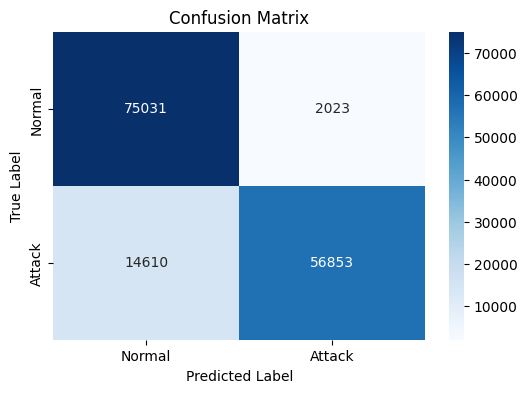

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
#Visualisasi
cm = confusion_matrix(y_binary, y_pred)
labels = ['Normal', 'Attack']
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

